In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# convert csv to dataframe
df_final=pd.read_csv("std.csv")
df_final

,Fuel type,body type,transmission,ownerNo,Brand,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats,Color,City
0,4,2,1,3,19,2015,400000.0,5,120000.0,23.10,998.0,5,121,0
1,4,6,1,2,6,2018,811000.0,2,32706.0,17.00,1497.0,5,121,0
2,4,2,1,1,27,2018,585000.0,2,11949.0,23.84,1199.0,5,97,0
3,4,7,1,1,9,2014,462000.0,2,17794.0,19.10,1197.0,5,76,0
4,1,6,1,1,19,2015,790000.0,5,60000.0,23.65,1248.0,5,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,4,2,1,1,19,2022,510000.0,5,10000.0,25.24,998.0,5,76,5
7174,4,2,1,1,19,2014,180000.0,5,120000.0,22.74,796.0,5,76,5
7175,4,7,0,3,20,2011,550000.0,5,50000.0,11.74,1796.0,5,76,5
7176,4,2,1,1,19,2012,140000.0,5,40000.0,18.50,1197.0,5,76,5


In [3]:
# statistical details of the data
df_final.describe()

,Fuel type,body type,transmission,ownerNo,Brand,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats,Color,City
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7.178000e+03,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000
mean,3.118417,4.216356,0.797576,1.372109,15.584007,2016.304402,6.182327e+05,3.835469,59925.381722,19.692297,1339.461828,5.171218,78.690582,2.448872
std,1.382797,2.264058,0.401835,0.645786,7.515660,3.678714,3.338828e+05,1.442922,35519.324226,3.742539,379.557012,0.606106,35.444819,1.715267
min,0.000000,0.000000,0.000000,0.000000,0.000000,1985.000000,1.000000e+05,0.000000,101.000000,7.080000,72.000000,2.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,9.000000,2014.000000,3.750000e+05,2.000000,33759.750000,17.400000,1197.000000,5.000000,75.000000,1.000000
50%,4.000000,3.000000,1.000000,1.000000,19.000000,2017.000000,5.500000e+05,5.000000,56557.000000,19.340000,1199.000000,5.000000,76.000000,2.000000
75%,4.000000,7.000000,1.000000,2.000000,19.000000,2019.000000,7.900000e+05,5.000000,80000.000000,21.790000,1497.000000,5.000000,102.000000,4.000000
max,4.000000,8.000000,1.000000,5.000000,30.000000,2023.000000,1.705000e+06,6.000000,975000.000000,140.000000,5000.000000,10.000000,133.000000,5.000000


In [4]:
# create x and y datas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
x=df_final.drop(columns=["price"],axis=1)
y=df_final["price"]

In [5]:
# scaling the data using StandardScaler
scaler=StandardScaler()
X_scaler_data=scaler.fit_transform(x)        



In [7]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(X_scaler_data, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df   

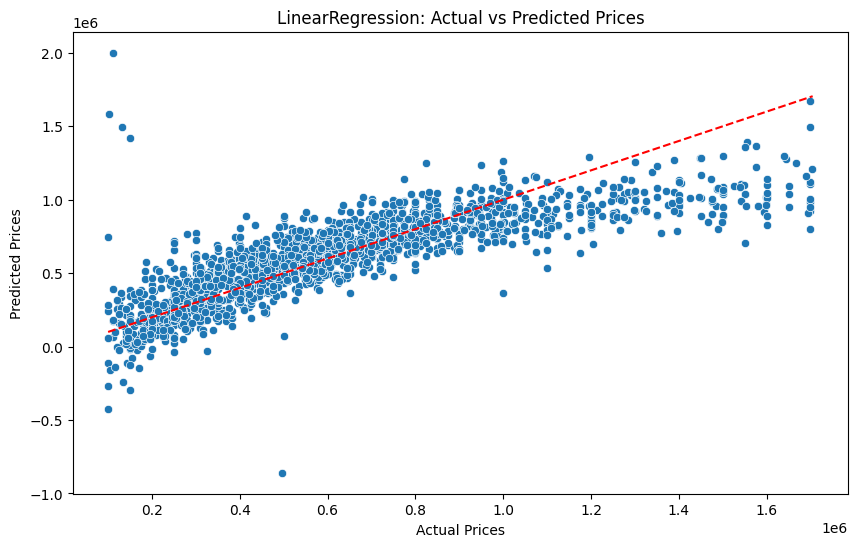

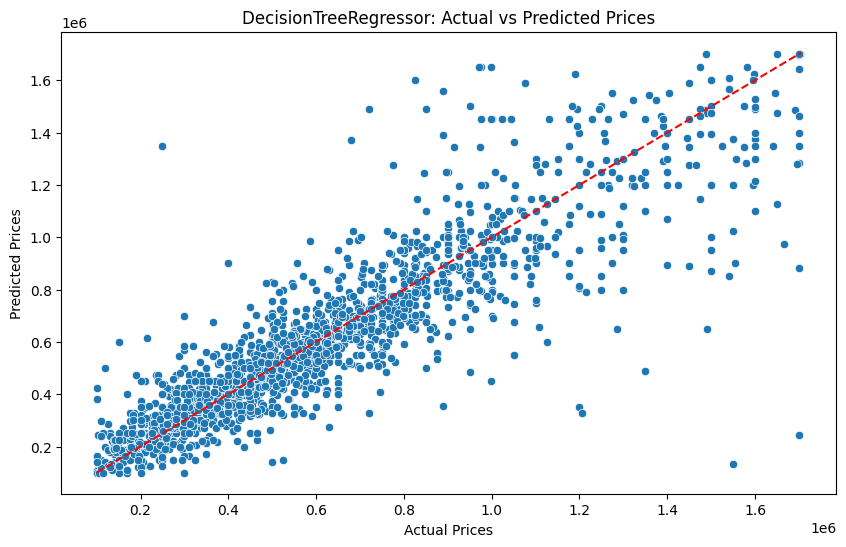

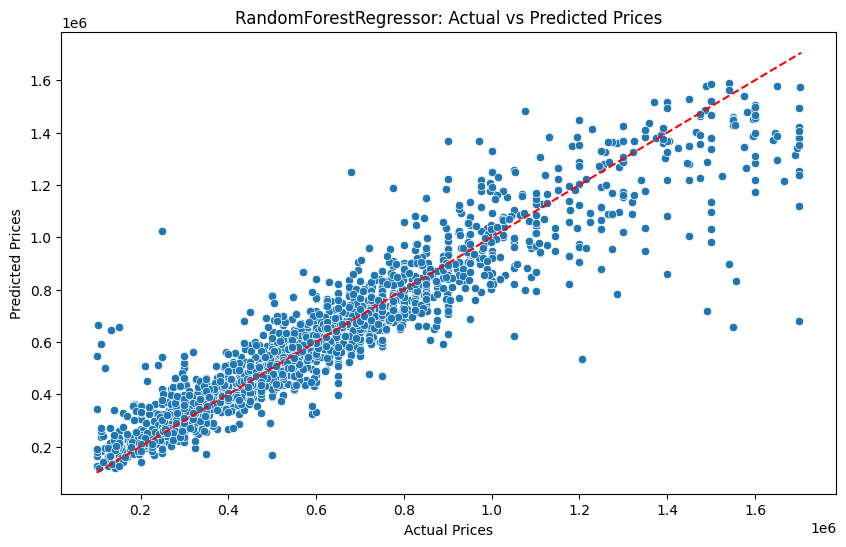

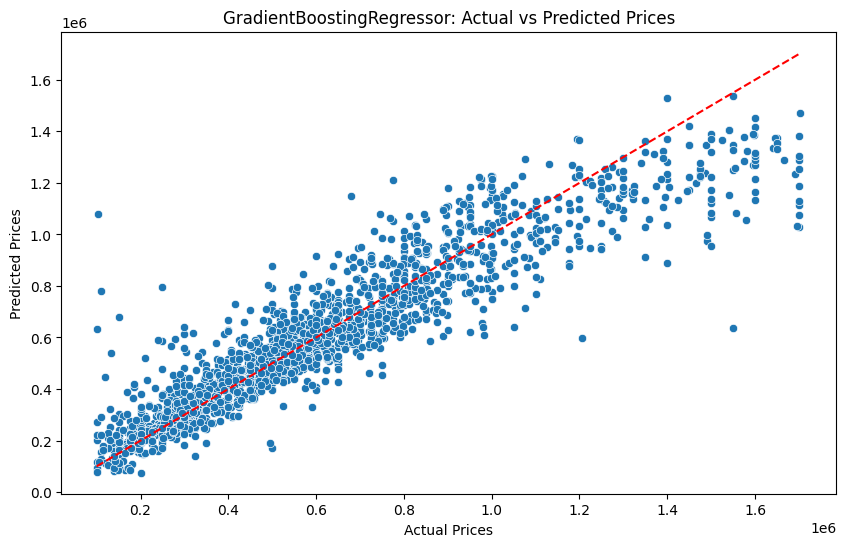

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor,GradientBoostingRegressor]

results_df = best_ML_algorithm(X_scaler_data,y, algorithms)

In [9]:
y

0       400000.0
1       811000.0
2       585000.0
3       462000.0
4       790000.0
          ...   
7173    510000.0
7174    180000.0
7175    550000.0
7176    140000.0
7177    500000.0
Name: price, Length: 7178, dtype: float64

In [10]:
# model comparision
results_df

,model,MAE,MSE,RMSE,R2
0,LinearRegression,139044.567791,4.097341e+10,202418.900932,0.655806
1,DecisionTreeRegressor,100993.871866,2.604261e+10,161377.242772,0.781231
2,RandomForestRegressor,77356.887054,1.445900e+10,120245.579593,0.878538
3,GradientBoostingRegressor,91738.172088,1.789680e+10,133778.909301,0.849660


## L1 and L2 Regularaization

In [11]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Ridge
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler_data, y, test_size=0.25, random_state=42)
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values=[]
for i in alpha_values:
    ridgeModel = Ridge(alpha=i)
    ridgeModel.fit(X_train,Y_train)
    y_pred=ridgeModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values.append(r_squr)

In [12]:
# best alpha values for prediction
best_alpha_ridge = alpha_values[np.argmax(values)]
ridgeModel_1 = Ridge(alpha=best_alpha_ridge)
ridgeModel_1.fit(X_train, Y_train)
y_pred_ridge=ridgeModel_1.predict(X_test)


In [13]:
X_scaler_data

array([[ 0.63758009, -0.97899881,  0.5037848 , ..., -0.28250765,
         1.19375317, -1.42779094],
       [ 0.63758009,  0.78786358,  0.5037848 , ..., -0.28250765,
         1.19375317, -1.42779094],
       [ 0.63758009, -0.97899881,  0.5037848 , ..., -0.28250765,
         0.51659717, -1.42779094],
       ...,
       [ 0.63758009,  1.22957918, -1.98497453, ..., -0.28250765,
        -0.07591433,  1.48741084],
       [ 0.63758009, -0.97899881,  0.5037848 , ..., -0.28250765,
        -0.07591433,  1.48741084],
       [-1.53208643,  0.78786358,  0.5037848 , ..., -0.28250765,
        -0.07591433,  1.48741084]])

In [14]:
# model evaluation
MSE_ridge=mean_squared_error(Y_test,y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,y_pred_ridge)
RMSE_ridge=np.sqrt(mean_squared_error(Y_test,y_pred_ridge))
r_squr_ridge=r2_score(Y_test,y_pred_ridge)

In [15]:
ridge=pd.DataFrame({"model":"RidgeRegressor","MAE":[MSE_ridge],"MSE":[MAE_ridge],"RMSE":[RMSE_ridge],"R2":r_squr_ridge})
ridge

,model,MAE,MSE,RMSE,R2
0,RidgeRegressor,4.093582e+10,138874.180738,202326.031087,0.656122


In [16]:
#convert dataframe to csv
path=r"C:/Users/Surenthiran/OneDrive/Desktop/Car_dekho/ridge.csv"
ridge.to_csv(path,index=False)

In [17]:
# using ridge to fit and evalutes the model
from sklearn.linear_model import Lasso
alpha_values_L = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
values_L=[]
for i in alpha_values_L:
    LassoModel = Lasso(alpha=i)
    LassoModel.fit(X_train,Y_train)
    y_pred=LassoModel.predict(X_test)
    r_squr=r2_score(Y_test,y_pred)
    values_L.append(r_squr)

In [18]:
# best alpha values for prediction
best_alpha_lasso = alpha_values_L[np.argmax(values_L)]
LassoModel_1 = Lasso(alpha=best_alpha_lasso)
LassoModel_1.fit(X_train, Y_train)
y_pred_lasso=LassoModel_1.predict(X_test)

In [19]:
# model evaluation
MSE_lasso=mean_squared_error(Y_test,y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,y_pred_lasso)
RMSE_lasso=np.sqrt(mean_squared_error(Y_test,y_pred_lasso))
r_squr_lasso=r2_score(Y_test,y_pred_lasso)

In [20]:
lasso=pd.DataFrame({"model":"LassoRegressor","MAE":[MSE_lasso],"MSE":[MAE_lasso],"RMSE":[RMSE_lasso],"R2":r_squr_lasso})
lasso

,model,MAE,MSE,RMSE,R2
0,LassoRegressor,4.097341e+10,139044.567778,202418.900945,0.655806


### Hyperparameter tuning for the best model-Random forest

In [21]:
# parameters for model
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators' :[100,150],
    'max_depth': [10,20],     
    'min_samples_split': [2,4], 
    'min_samples_leaf': [1,2],
    'max_features'    : ['sqrt', 'auto'],
     'bootstrap':[True] }

In [22]:
# tuning the model using grid search cv
grid_tuning=GridSearchCV(estimator=RandomForestRegressor(),
                            param_grid=param_grid, cv=3, n_jobs=-1)
grid_tuning.fit(X_train,Y_train)

c:\Users\Surenthiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Surenthiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Surenthiran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Surenthiran\AppData\Local\Programs\Python\Python312\Lib\site-

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 150]})

In [23]:
grid_tuning.best_params_,grid_tuning.best_score_

({'bootstrap': True,
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 np.float64(0.8509489508265707))

In [24]:
# final model fit and prediction
final_model=RandomForestRegressor(n_estimators=150,max_features='sqrt',max_depth=20,min_samples_leaf=1,
                                  min_samples_split=2,random_state=42)
final_model.fit(X_train,Y_train)
y_pred_fm=final_model.predict(X_test)
MSE_fm=mean_squared_error(Y_test,y_pred_fm)
MAE_fm=mean_absolute_error(Y_test,y_pred_fm)
RMSE_fm=np.sqrt(mean_squared_error(Y_test,y_pred_fm))
r_squr_fm=r2_score(Y_test,y_pred_fm)
rf_1=pd.DataFrame({"model":"RandomForestRegressor","MAE":[MAE_fm],"MSE":[MSE_fm],"RMSE":[RMSE_fm],"R2":r_squr_fm})
rf_1

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,80764.880942,1.533153e+10,123820.543983,0.871209


In [25]:
X_test

array([[ 0.63758009, -0.97899881,  0.5037848 , ..., -0.28250765,
        -0.07591433,  0.32133013],
       [-1.53208643,  1.22957918, -1.98497453, ..., -0.28250765,
        -2.02273783, -0.26171023],
       [-1.53208643,  1.22957918,  0.5037848 , ..., -0.28250765,
         1.19375317,  0.90437048],
       ...,
       [ 0.63758009, -0.97899881,  0.5037848 , ..., -0.28250765,
         0.51659717,  1.48741084],
       [-1.53208643, -0.97899881,  0.5037848 , ..., -0.28250765,
         1.19375317,  0.32133013],
       [ 0.63758009,  0.78786358,  0.5037848 , ..., -0.28250765,
        -1.994523  ,  0.32133013]])

###  store the model using pickle


In [26]:
import pickle
# store the model using pickle

with open('Randomforest_regression.pkl','wb') as files:
    pickle.dump(final_model,files)

In [27]:
# load the model
with open('Randomforest_regression.pkl','rb') as files:
    final_model=pickle.load(files)

In [28]:
# save the scaling model
with open('std_scaler.pkl','wb') as files_std:
    pickle.dump(scaler,files_std)

In [29]:
# open the scaling model

with open('std_scaler.pkl','rb') as files_std:
    scaler=pickle.load(files_std)

## model system buliding

In [30]:
new_df=pd.DataFrame({
    'Fuel type':'Petrol',
    'body type':'Hatchback',
    'transmission':'Manual',
    'ownerNo':3,
    'Brand':'Maruti',
    'modelYear':2018,
    'Insurance Validity': 'Third Party insurance',
    'Kms Driven': 10000.0,
    'Mileage':30,
    'Engine':998.0,
    'Seats':5,
    'Color':'White',
    'City':'Chennai'
},index=[0])

In [31]:
import pickle
from typing import Dict, Any

def load_label_encoders(file_path: str) -> Dict[str, Any]:
    try:
        with open(file_path, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return {}
    except pickle.UnpicklingError:
        print(f"Error: Unable to unpickle the file '{file_path}'.")
        return {}

def find_closest_key(column_name: str, available_keys: list) -> str:
    if not available_keys:
        return ""
    return min(available_keys, key=lambda x: levenshtein_distance(column_name, x))

def levenshtein_distance(s1: str, s2: str) -> int:
    # Simple Levenshtein distance implementation
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

# Load the label_encoders dictionary
label_encoders = load_label_encoders('label_encoders.pkl')

if not label_encoders:
    print("Error: label_encoders dictionary is empty. Please check your pickle file.")
else:
    print("Keys in label_encoders:", list(label_encoders.keys()))

    # Apply the correct LabelEncoder to each categorical column
    for col in new_df.columns:
        if new_df[col].dtype == 'object' or new_df[col].dtype.name == 'category':
            encoder_key = col
            if col not in label_encoders:
                # Try to find a close match
                encoder_key = find_closest_key(col, list(label_encoders.keys()))
                if encoder_key:
                    print(f"Warning: Exact match for '{col}' not found. Using closest match: '{encoder_key}'")
                else:
                    print(f"Error: No suitable encoder found for column '{col}'. Skipping this column.")
                    continue
            
            try:
                le = label_encoders[encoder_key]
                # Transform the column using the correct LabelEncoder
                new_df[col] = le.transform(new_df[col].astype(str))
                print(f"Successfully encoded column: '{col}'")
            except KeyError:
                print(f"Error: Encoder for '{encoder_key}' not found in label_encoders. Skipping this column.")
            except ValueError as e:
                print(f"Error encoding column '{col}': {str(e)}")

    # Print the dataframe info to verify the changes
    print("\nDataFrame info after encoding:")
    print(new_df.info())

Keys in label_encoders: ['Fuel type', 'body type', 'transmission', 'Brand', 'Insurance Validity', 'Color', 'City']
Successfully encoded column: 'Fuel type'
Successfully encoded column: 'body type'
Successfully encoded column: 'transmission'
Successfully encoded column: 'Brand'
Successfully encoded column: 'Insurance Validity'
Successfully encoded column: 'Color'
Successfully encoded column: 'City'

DataFrame info after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuel type           1 non-null      int64  
 1   body type           1 non-null      int64  
 2   transmission        1 non-null      int64  
 3   ownerNo             1 non-null      int64  
 4   Brand               1 non-null      int64  
 5   modelYear           1 non-null      int64  
 6   Insurance Validity  1 non-null      int64  
 7   Kms Driven          1 non

In [32]:

# Load the label_encoders dictionary from the pickle file
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# Apply the correct LabelEncoder to each categorical column
for col in new_df.columns:
    if new_df[col].dtype == 'object' or new_df[col].dtype.name == 'category':
        # Retrieve the corresponding LabelEncoder from the dictionary
        le = label_encoders[col]
        
        # Transform the column using the correct LabelEncoder
        new_df[col] = le.transform(new_df[col])


In [33]:
new_df

,Fuel type,body type,transmission,ownerNo,Brand,modelYear,Insurance Validity,Kms Driven,Mileage,Engine,Seats,Color,City
0,4,2,1,3,19,2018,5,10000.0,30,998.0,5,121,1


In [34]:
# scale the input
scaling=scaler.transform(new_df)

#model prediction
prediction=final_model.predict(scaling)
print(f"The price of the car:{round(prediction[0], 2)}")

The price of the car:473116.67
